# DATA ANALYSIS OF WeRateDogs TWEETS FROM THE TWITTER API
The data for this analysis was gathered from three different sources; `twitter-archive-enhanced.csv`, `https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv`, and twitter API.

After gathering, both visual assessment and programmatic assessment was carried out on the data to identify quality and tidiness issues on the data. This issue were erased to make the data ready for analyses.

A couple of questions were answered during the analysis.

## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests as rq
import json as js
import tweepy as tw

## GATHERING THE DATA

### Reading the given `twitter-archive-enhanced.csv` file

In [2]:
df = pd.read_csv('twitter-archive-enhanced.csv')
df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


### Getting the predicted image file from a URL using the request library

In [3]:
url =  'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = rq.get(url)

In [4]:
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [5]:
image_df = pd.read_table('image-predictions.tsv')
image_df.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


### Gathering favorite_count and retweet_count from twitter API
>- This would be gotten through iterating through each tweet_id
>- The favorite_count and retweet_count for each tweet_id would be extracted

In [6]:
# Twitter authentification credential
consumer_key = 'consumer_key'
consumer_secret = 'consumer_secret'
access_token = 'access_token'
access_secret = 'access_secret'

#Connecting to the API
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

#building the api 
#wait on rate limit helps to handle error that would generate when we exceed our twitter rate limit
api = tw.API(auth, wait_on_rate_limit=True) 

In [7]:

# df_tweets = [] # an empty list to gather each tweet_id, retweet_count and favorite_count

# #Creating a for loop to iterate through each tweet_id of the dataframe
# for i in df.tweet_id:
#     try:
#         #accessing tweet information for each tweet id
#         tweet = api.get_status(i, tweet_mode='extended')
#         #store the tweet_id, retweet_count and favorite_count in a dataframe
#         df_tweets.append({'tweet_id':tweet.id, 'retweet_count':tweet.retweet_count, 'favorite_count':tweet.favorite_count})
#         print(i)
#     #handling errors generated from tweet_id which might have been deleted
#     except tw.errors.NotFound: 
#         pass
#     #handling errors generated by tweet_ids we are forbidden to access
#     except tw.errors.Forbidden:
#         pass

In [8]:
# df_tweets

In [9]:
# #save json file as tweet_json.txt
# with open('tweet_json.txt', 'w') as f:
#     js.dump(df_tweets, f)

In [10]:
#Read Json file
with open('tweet_json.txt', 'r') as f:
    df_tweets = js.load(f)

In [11]:
#putting the read json file in a pandas dataframe
retweet_favorite_df = pd.DataFrame(data=df_tweets)
retweet_favorite_df.head(3)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7019,33841
1,892177421306343426,5303,29356
2,891815181378084864,3486,22075


## ASSESSING THE DATA

#### Visual Assessment Of The Three Dataset

In [12]:
#visualizing the twitter-archive-enhanced.csv data by randomly selecting 50rows
df.head(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
#visualizing the image-predictions.tsv dataset by randomly selecting 50rows
image_df.sample(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1938,860524505164394496,https://pbs.twimg.com/media/C_EyeKuXkAAdxY-.jpg,1,Bedlington_terrier,0.286558,True,toy_poodle,0.235193,True,Lakeland_terrier,8.795070e-02,True
757,688547210804498433,https://pbs.twimg.com/media/CY42CFWW8AACOwt.jpg,1,papillon,0.531279,True,Blenheim_spaniel,0.214197,True,Border_collie,5.383990e-02,True
805,691756958957883396,https://pbs.twimg.com/media/CZmdSD8UcAAnY5R.jpg,1,Saint_Bernard,0.342571,True,boxer,0.289096,True,Pembroke,7.646340e-02,True
730,686618349602762752,https://pbs.twimg.com/media/CYdbvwjWcAEtjYu.jpg,1,Rottweiler,0.441331,True,miniature_pinscher,0.233180,True,Gordon_setter,9.358200e-02,True
205,669923323644657664,https://pbs.twimg.com/media/CUwLtPeU8AAfAb2.jpg,1,car_mirror,0.343063,False,seat_belt,0.110289,False,wing,8.014850e-02,False
1131,728046963732717569,https://pbs.twimg.com/media/ChqK2cVWMAAE5Zj.jpg,1,Newfoundland,0.255971,True,groenendael,0.175583,True,German_shepherd,1.641350e-01,True
126,668256321989451776,https://pbs.twimg.com/media/CUYflCXWEAAzQVu.jpg,1,canoe,0.407683,False,paddle,0.115550,False,Pembroke,9.442940e-02,True
351,672523490734551040,https://pbs.twimg.com/media/CVVIjGbWwAAxkN0.jpg,1,golden_retriever,0.565981,True,chow,0.081212,True,Irish_terrier,6.159600e-02,True
408,673711475735838725,https://pbs.twimg.com/media/CVmA_osW4AArAU1.jpg,1,Maltese_dog,0.607401,True,toy_poodle,0.143836,True,Sealyham_terrier,6.390700e-02,True
1274,750041628174217216,https://pbs.twimg.com/media/CmfssOtXYAAKa_Z.jpg,1,Labrador_retriever,0.252031,True,Maltese_dog,0.188090,True,golden_retriever,1.330170e-01,True


In [14]:
#visualizing the tweet_json.txt dataset by randomly selecting 50rows
retweet_favorite_df.sample(50)

,tweet_id,retweet_count,favorite_count
2071,670704688707301377,320,687
402,822163064745328640,4391,0
1878,674447403907457024,315,958
1660,681523177663676416,5217,13203
801,769695466921623552,1564,6052
313,833479644947025920,1897,14047
1109,728046963732717569,1086,3951
207,850333567704068097,301,3199
1484,691321916024623104,602,2393
2068,670733412878163972,447,851


#### Programatic Assessment Of The Datas

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
#getting the percentage of null values
df.isnull().sum() * 100 / len(df) 

tweet_id                       0.000000
in_reply_to_status_id         96.689304
in_reply_to_user_id           96.689304
timestamp                      0.000000
source                         0.000000
text                           0.000000
retweeted_status_id           92.317487
retweeted_status_user_id      92.317487
retweeted_status_timestamp    92.317487
expanded_urls                  2.504244
rating_numerator               0.000000
rating_denominator             0.000000
name                           0.000000
doggo                          0.000000
floofer                        0.000000
pupper                         0.000000
puppo                          0.000000
dtype: float64

In [17]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
image_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
retweet_favorite_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [21]:
#Searching for duplicate rows in twitter-archive
df[df.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [22]:
#Searching for duplicate rows in image-prediction df
image_df[image_df.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [23]:
#Searching for duplicate rows in retweet-favorite df
retweet_favorite_df[retweet_favorite_df.duplicated()]

,tweet_id,retweet_count,favorite_count


In [24]:
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

#### Quality Issues

#### `twitter-archive` table
>- 5columns have over 90% missing values
>- Data type of tweet_id column is an integer, it needs to be converted to a string
>- Data type of timestamp is an object instead of a datetime
>- Some names like **FlÃ¡vio**, **GÃ²rdÃ³n**, **AmÃ©lie**, **OliviÃ©r**, **RalphÃ©**, **DevÃ³n** are not in the format of English alphabet
>- Source of tweet are within html attributes in the `source` column. This should be extracted
>- The maximum value of the rating numerator is an outlier; it is very far from the mean value

#### `image-prediction` table
>- Data type of the tweet_id is an integer instead of a string
>- Drop columns `p2`, `p3`. They won't be useful for our analysis
>- Predicted names on column `p1` is in both capital and small letters. They should be in small letters.

#### `retweet-favorite` table
>- Data type of the tweet_id is an integer instead of a string

#### Tidiness
>- Dog stages are in 4columns; `doggo`, `floofer`, `pupper`, `puppo`. 
>- Merge all three columns then drop duplicate columns

### CREATING CLEAN COPIES OF THE DATA

In [25]:
df_clean = df.copy()

In [26]:
image_clean = image_df.copy()

In [27]:
retweet_favorite_clean = retweet_favorite_df.copy()

## CLEANING THE DATA

### [1] twitter-arhive table:
5columns have over 90% missing values

#### Define
Drop the columns: (`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`)

#### Code

In [28]:
df_clean = df_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])

#### Test

In [29]:
df_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


### [2] twitter-arhive table: 
Data type of tweet_id column is an integer, it needs to be converted to a string

#### Define
The datatype on the tweet_id column should be converted to a string

#### Code

In [30]:
df_clean['tweet_id']  = df_clean['tweet_id'].astype(str)

#### Test

In [31]:
df_clean.dtypes

tweet_id              object
timestamp             object
source                object
text                  object
expanded_urls         object
rating_numerator       int64
rating_denominator     int64
name                  object
doggo                 object
floofer               object
pupper                object
puppo                 object
dtype: object

### [3] twitter-archive table: 
Data type of timestamp is an object instead of a datetime

#### Define
Converting the data of the timestamp column from string to datetime

#### Code

In [32]:
df_clean['timestamp'] = df_clean['timestamp'].astype({'timestamp': 'datetime64[ns]'})

#### Test

In [33]:
df_clean.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
dtype: object

### [4] twitter-archive table:
Some names like FlÃ¡vio, GÃ²rdÃ³n, AmÃ©lie, OliviÃ©r, RalphÃ©, DevÃ³n, Gòrdón, Flávio are not in the format of English alphabet

#### Define
Renamining the foreign alphabet name into their english alphabet format

#### Code

In [34]:
df_clean = df_clean.replace({'FlÃ¡vio':'Flavio',
                             'Flávio':'Flavio',
                             'GÃ²rdÃ³n':'Gardan', 
                             'Gòrdón':'Gardan',
                             'AmÃ©lie':'Amelie',
                             'Amélie':'Amelie',
                             'OliviÃ©r':'Olivia',
                             'Oliviér':'Olivia',
                             'RalphÃ©':'Ralpha', 
                             'Ralphé':'Ralpha',
                             'DevÃ³n':'Devan',
                             'Devón':'Devan', 
                             'Frönq':'Fronq'})

#### Test

In [35]:
for name in df_clean.name:
    if name in ['FlÃ¡vio','Flavio','GÃ²rdÃ³n','Gardan','AmÃ©lie','Amelie','OliviÃ©r','Olivia','RalphÃ©','Ralpha','DevÃ³n','Devan','Frönq','Fronq']:
        print(f'{name} in name column')
    else:
        pass

Olivia in name column
Devan in name column
Ralpha in name column
Flavio in name column
Olivia in name column
Fronq in name column
Olivia in name column
Flavio in name column
Olivia in name column
Amelie in name column
Gardan in name column


In [36]:
# Double checking for the irregular letters
for names in df_clean.name:
    print(names)

Phineas
Tilly
Archie
Darla
Franklin
None
Jax
None
Zoey
Cassie
Koda
Bruno
None
Ted
Stuart
Oliver
Jim
Zeke
Ralphus
Canela
Gerald
Jeffrey
such
Canela
None
None
Maya
Mingus
Derek
Roscoe
None
Waffles
None
Jimbo
Maisey
None
Lilly
None
Earl
Lola
Kevin
None
None
Yogi
Noah
Bella
Grizzwald
None
Rusty
Gus
Stanley
Alfy
Koko
Rey
Gary
None
a
Elliot
Louis
None
Bella
Jesse
None
Romeo
None
Bailey
Duddles
Jack
Emmy
Steven
Beau
Snoopy
None
Shadow
Terrance
Shadow
Emmy
Aja
None
Penny
Dante
Nelly
Ginger
None
Benedict
Venti
Goose
Nugget
None
None
Cash
Coco
Jed
None
Sebastian
Walter
None
Sierra
Sierra
None
None
None
Monkey
None
Harry
Kody
Lassie
Rover
Napolean
Dawn
None
Boomer
None
None
Cody
Zoey
Rumble
Clifford
quite
Dewey
Stanley
Scout
Gizmo
Walter
Cooper
None
Cooper
None
Harold
Shikha
None
None
Jamesy
None
Lili
Jamesy
Coco
None
Boomer
Sammy
Nelly
None
Meatball
Paisley
Albus
Neptune
Quinn
Belle
None
None
Quinn
Zooey
Dave
Jersey
None
None
Hobbes
None
Burt
Lorenzo
None
Lorenzo
Carl
Jordy
None
None
Milky
Troop

None
None
Hammond
Lorelei
the
Olive
None
Marty
Brooks
Otis
None
None
None
Rocky
None
Petrick
Hubertson
Alfie
Gerbald
None
Jerry
Oreo
Bruiser
None
Perry
None
None
Theodore
None
None
Bobby
None
Pippa
Jeph
Obi
None
None
None
Tino
None
Kulet
Sweets
None
Lupe
Sadie
Tiger
Jiminy
None
None
Buddy
Sebastian
None
Griffin
Banjo
None
None
Jack
None
Brandy
Larry
None
None
Lulu
Darrel
None
None
Taco
None
Joey
None
None
Patrick
Kreg
Brody
Todo
Jax
Samson
None
Tess
None
Ulysses
None
Jimothy
Charlie
Bo
None
Toffee
None
Apollo
Carly
None
Asher
Glacier
Chuck
actually
Sarge
Panda
Champ
None
Aspen
None
Ozzie
Alice
Sadie
Griswold
Cheesy
Ellie
None
None
Moofasa
Brody
Penny
Percy
None
Hector
None
CeCe
Toby
None
None
Goliath
Kawhi
Reggie
Ozzy
None
by
Emmie
Sammy
Penelope
Rocco
None
Bruce
Willie
None
Rinna
None
Hunter
Mike
a
None
William
Dwight
Evy
Hurley
None
Rubio
None
Louis
officially
Chompsky
None
Rascal
None
Lola
None
Linda
Tug
Mia
Wilson
Dash
Tango
None
None
Grizz
None
Crystal
Jerome
None
None
Bella
Crump

### [5] twitter-archive table: 
Source of tweet are within html attributes in the source column. This should be extracted

#### Define
The source column would be clean by discarding the html attributes and leaving behind the source only

#### Code

In [37]:
df_clean.source = df_clean.source.str.split('>').str[1].str[0:-3]
df_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


#### Test

In [38]:
df_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### [6] twitter-archive table:
The maximum value of the rating numerator is an outlier; it is very far from the mean value

#### Define
The maximum value row would be dropped

#### Code

In [39]:
#### Locating the index of the maximum value
df_clean[df_clean.rating_numerator == df_clean.rating_numerator.max()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [40]:
df_clean = df_clean.drop(979)

#### Test

In [41]:
assert(df_clean.rating_numerator.max() != 1776)

### [7] image-prediction table:
Data type of the tweet_id is an integer instead of a string

#### Define
Convert datatype of the tweet_id to string

#### Code

In [42]:
image_clean.tweet_id = image_clean.tweet_id.astype(str)

#### Test

In [43]:
image_clean.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

### [8] image-prediction table:
Drop columns p2, p3. They won't be useful for our analysis

#### Define
Column p2 and p3 would be deleted from the image prediction table using the pandas drop function

#### Code

In [44]:
image_clean = image_clean.drop(columns=['p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'])
image_df.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


#### Test

In [45]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
dtypes: bool(1), float64(1), int64(1), object(3)
memory usage: 83.2+ KB


### [9] image-prediction table:
Predicted names on column p1 is in both capital and small letters. They should be in small letters.

#### Define
Each column element would be converted to small letters using str.lower() method in python

#### Code

In [46]:
image_clean.p1 = image_clean.p1.str.lower()

#### Test

In [47]:
image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True


### [10] retweet-favorite table:
Data type of the tweet_id is an integer instead of a string

#### Define
Data type of the retweet favorite column would be converted to string

#### Code

In [48]:
retweet_favorite_clean.tweet_id = retweet_favorite_clean.tweet_id.astype(str)

#### Test

In [49]:
retweet_favorite_clean.dtypes

tweet_id          object
retweet_count      int64
favorite_count     int64
dtype: object

## TIDING THE DATA

#### [1] Dog stages are in 4columns; doggo, floofer, pupper, puppo. 

#### Define
The dog stages should be merged into a single column

#### Code

In [50]:
df_clean = df_clean.replace('None', '')
df_clean.loc[:, 'dog_stage'] = df_clean[['doggo', 'floofer', 'pupper', 'puppo']].agg(''.join, axis=1)

In [51]:
df_clean = df_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'])
df_clean.dog_stage = df_clean.dog_stage.replace('','None')

#### Test

In [52]:
df_clean.dog_stage.value_counts()

None            1975
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [53]:
print(df.doggo.value_counts())
print(df.floofer.value_counts())
print(df.pupper.value_counts())
print(df.puppo.value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


#### [2] Merge all three columns then drop duplicate columns

#### Define
Using the merge function and joining on tweet_id, all columns would be merge

#### Code

In [54]:
df_weratedogs = df_clean.merge(image_clean, on='tweet_id').merge(retweet_favorite_clean, on='tweet_id')

#### Test

In [55]:
df_weratedogs.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,7019,33841
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,5303,29356
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,3486,22075
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,7232,36970
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,7772,35346
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,chesapeake_bay_retriever,0.425595,True,2603,17829
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,appenzeller,0.341703,True,1669,10380
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,pomeranian,0.566142,True,15772,56910
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,irish_terrier,0.487574,True,3627,24551
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,pembroke,0.511319,True,6107,27984


In [56]:
df_weratedogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2055
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2056 non-null   object        
 1   timestamp           2056 non-null   datetime64[ns]
 2   source              2056 non-null   object        
 3   text                2056 non-null   object        
 4   expanded_urls       2056 non-null   object        
 5   rating_numerator    2056 non-null   int64         
 6   rating_denominator  2056 non-null   int64         
 7   name                2056 non-null   object        
 8   dog_stage           2056 non-null   object        
 9   jpg_url             2056 non-null   object        
 10  img_num             2056 non-null   int64         
 11  p1                  2056 non-null   object        
 12  p1_conf             2056 non-null   float64       
 13  p1_dog              2056 non-null   bool        

### Saving the merge table in csv format

In [57]:
#df_weratedogs.to_csv('twitter_archive_master.csv')

### ANALYSING AND VISUALIZING THE DATA

### Questions answered during analyses
The data analyses would answer the following questions:
- What dogs have the top five retweet count
- what dogs have the least three favorite counts
- What is the total retweet count for each predicted dog breed
- Which predicted dog breed has the highest total retweet count (top 5) for the period under review.
- which dog breed has the highest rating

#### What dogs have the top five retweet count
This would be gotten by using a pandas function `nlargest`
>- From our query, we could see that `labrador_retriever, eskimo_dog, chihuahua, lakeland_terrier, english_springer` with the respective tweet_id 744234799360020481, 739238157791694849, 807106840509214720, 822872901745569793, 879415818425184262 are the top dogs with the highest retweet count

In [58]:
# Reading the twitter_archive_master.csv file
df_weratedogs=pd.read_csv('twitter_archive_master.csv')
df_weratedogs.head(2)

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count
0,0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,7019,33841
1,1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,5303,29356


In [59]:
df_weratedogs.nlargest(n=5, columns='retweet_count')

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count
835,835,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,NaN,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,labrador_retriever,0.825333,True,70830,144933
870,870,739238157791694849,2016-06-04 23:31:25,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13,10,NaN,doggo,https://pbs.twimg.com/ext_tw_video_thumb/73923...,1,eskimo_dog,0.503372,True,52963,107350
422,422,807106840509214720,2016-12-09 06:17:20,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,None,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,chihuahua,0.505370,True,51741,111799
319,319,822872901745569793,2017-01-21 18:26:02,Twitter for iPhone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,NaN,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,lakeland_terrier,0.196015,True,39972,124208
59,59,879415818425184262,2017-06-26 19:07:24,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13,10,Duddles,None,https://pbs.twimg.com/ext_tw_video_thumb/87941...,1,english_springer,0.383404,True,37486,92956


#### what dogs have the least three favorite counts
This would be gotten by using a pandas function nsmallest
>- From the query below, we can see that `labrador_retriever, irish_setter, blenheim_spaniel` with tweet_id 885311592912609280, 	877611172832227328, 867072653475098625 are the dogs with the least favorite count

In [60]:
df_weratedogs.nsmallest(n=3, columns='favorite_count')

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count
32,32,885311592912609280,2017-07-13 01:35:06,Twitter for iPhone,RT @dog_rates: This is Lilly. She just paralle...,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,labrador_retriever,0.908703,True,15450,0
67,67,877611172832227328,2017-06-21 19:36:23,Twitter for iPhone,RT @rachel2195: @dog_rates the boyfriend and h...,https://twitter.com/rachel2195/status/87685077...,14,10,NaN,pupper,https://pbs.twimg.com/media/DCszHgmW0AAmIpT.jpg,1,irish_setter,0.364729,True,70,0
107,107,867072653475098625,2017-05-23 17:40:04,Twitter for iPhone,RT @rachaeleasler: these @dog_rates hats are 1...,https://twitter.com/rachaeleasler/status/86501...,13,10,NaN,None,https://pbs.twimg.com/media/DAElHfmUMAEH9lB.jpg,1,blenheim_spaniel,0.352946,True,101,0


#### What is the retweet count for each predicted dog breed
We would group by predicted dog breed the total retweet_count

In [61]:
dog_breed_retweet = df_weratedogs.groupby('p1', as_index=False)['retweet_count'].sum()
dog_breed_retweet

,p1,retweet_count
0,acorn_squash,3225
1,afghan_hound,22979
2,african_crocodile,206
3,african_grey,1030
4,african_hunting_dog,970
...,...,...
372,wood_rabbit,2039
373,wooden_spoon,2753
374,wool,1129
375,yorkshire_terrier,9362


#### Which predicted dog breed has the highest total retweet count (top 5) for the period under review
This would be gotten by using the nlargest method
> From our analysis, we could see that `golden_retriever, labrador_retriever, pembroke, chihuahua, samoyed` are the dog breed with the highest retweet counts

In [62]:
dog_breed_retweet.nlargest(n=5, columns='retweet_count')

,p1,retweet_count
139,golden_retriever,474145
186,labrador_retriever,310010
249,pembroke,227777
77,chihuahua,200613
281,samoyed,163946


#### which dog breed has the highest rating
Highest rating would be gotten by dividing the rating numerator by the denominator. Then highest rating would be gotten using the max function.
> The maximum dog rating of 42 indicates that there are either outliers or errors in the dog_rating data

In [63]:
df_weratedogs['dog_rating'] = df_weratedogs.rating_numerator/df_weratedogs.rating_denominator

In [64]:
print(f'The maximum dog rating is {df_weratedogs.dog_rating.max()}')
df_weratedogs[df_weratedogs.dog_rating == df_weratedogs.dog_rating.max()]

The maximum dog rating is 42.0


,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count,dog_rating
1778,1778,670842764863651840,2015-11-29 05:52:33,Twitter for iPhone,After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420,10,NaN,None,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,microphone,0.096063,False,7584,22112,42.0


### VISUALIZATION

#### Visualizing selected variables using a box plot
We would be visualizing the dog_rating, retweet_count, favorite_count columns using a box plot
>- For the dog rating, we could see a couple of outliers
>- For the retweet, some tweets have very high retweet counts
>- Also for the favorite count, the likes are very high

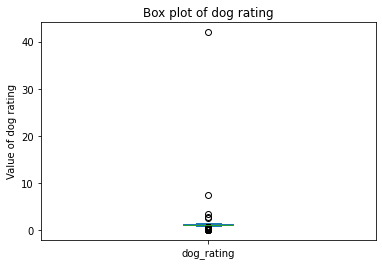

In [65]:
df_weratedogs.dog_rating.plot(kind='box')
plt.ylabel('Value of dog rating')
plt.title('Box plot of dog rating');

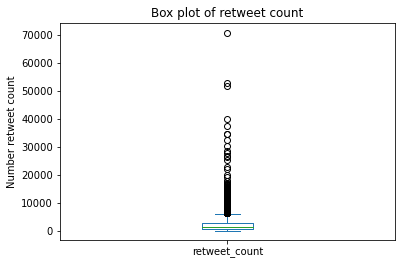

In [66]:
df_weratedogs.retweet_count.plot(kind='box')
plt.ylabel('Number retweet count')
plt.title('Box plot of retweet count');

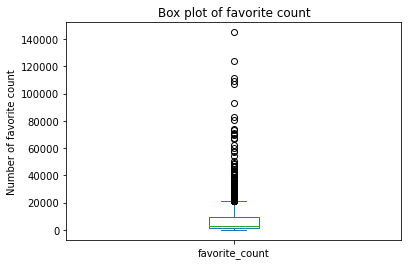

In [67]:
df_weratedogs.favorite_count.plot(kind='box')
plt.ylabel('Number of favorite count')
plt.title('Box plot of favorite count');

#### Relationship between dog_rating and retweet_count
This relationship would be visualized using a seaborn joint plot.
>- The graph shows a positive relationship between the dog rating and the retweet count. However, the rating is concentrated around values less than 5

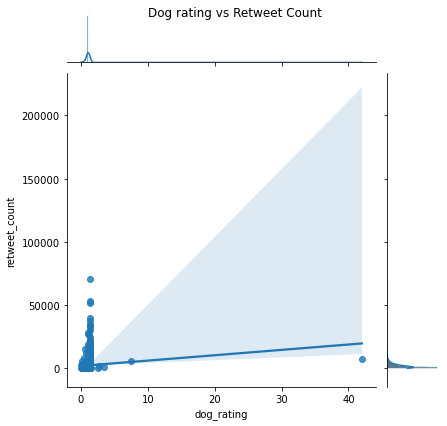

In [68]:
p = sns.jointplot(x='dog_rating', y='retweet_count', data=df_weratedogs, kind='reg')
p.fig.suptitle('Dog rating vs Retweet Count');

#### Relationship between retween count and favorite count
We would be using seaborn jointplot to visualize this relationship
>- From the jointplot, there is a positive relationship between the retween count and the favorite count.
>- There are lots of posts that has zero likes

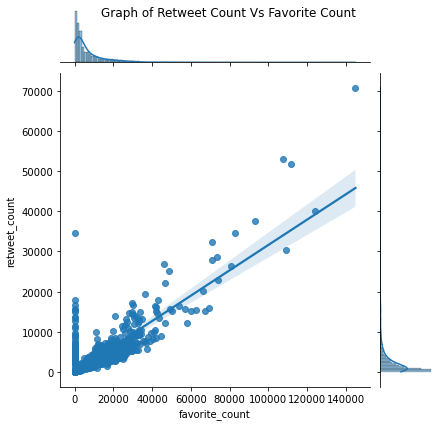

In [69]:
p = sns.jointplot(x='favorite_count', y='retweet_count', data=df_weratedogs, kind='reg')
p.fig.suptitle('Graph of Retweet Count Vs Favorite Count');

## CONCLUSIONS
> **Result:** The following deuctions can be made from our data
>- Dog breeds like labrador_retriever, eskimo_dog, chihuahua, lakeland_terrier, english_springer are among dogs with the highest retweet counts
>- labrador_retriever, irish_setter, blenheim_spaniel are among dogs with the least favorite counts
>- The maximum dog rating of 42 indicates that there are still outliers or errors in the dataset
>- There is a direct relationship between retweet count and favorite count

> **Limitations:** The following limitations were encountered during analysis
>- We were not able to create any hypothesis or statistical inferences from our data, because the statistics used are descriptive and not inferential
>- We are working with a sample data, which implies uncertainty (a different sample may lead to different results)
>- There were issues with the sample of data: missing observations, data that appears to be inconsistent